# Problem Statement 

Solar power consumption has been recorded by city councils at regular intervals. The reason behind doing so is to understand how businesses are using solar power so that they can cut down on nonrenewable sources of energy and shift towards renewable energy.

# Understanding the Problem Statement


Business Objective:Maximize Renewable energy.

Constraints :Minimise Nonrenewable energy


# Understanding Success Criteria  for Given Problem



Business Success Criteria:Increase the sales of Homes.

Economical success Criteria:Increase the renewable energy consumption

In [12]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [13]:
#Import the data
df = pd.read_csv("/Users/macbookpro/Desktop/hdd/DS/Assignment/28-Forecasting/Datasets_Forecasting-3/solarpower_cumuldaybyday2.csv")
df.head()

,date,cum_power
0,26/10/2011,0.1
1,27/10/2011,10.2
2,28/10/2011,20.2
3,29/10/2011,29.6
4,30/10/2011,34.2


In [14]:
# Returns the Descriptive summary of dataset
df.describe()

,cum_power
count,2558.000000
mean,13461.057349
std,8129.192104
min,0.100000
25%,6665.350000
50%,13000.500000
75%,20183.750000
max,28120.000000


# Exploring the Dataset

In [15]:
# Returns number of rows and columns of the dataset
df.shape

(2558, 2)

In [16]:
# Returns an object with all of the column headers 
df.columns

Index(['date', 'cum_power'], dtype='object')

In [17]:
# Returns the null values count
df.isnull().sum()

date         0
cum_power    0
dtype: int64

In [18]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

date          object
cum_power    float64
dtype: object

<Axes: ylabel='cum_power'>

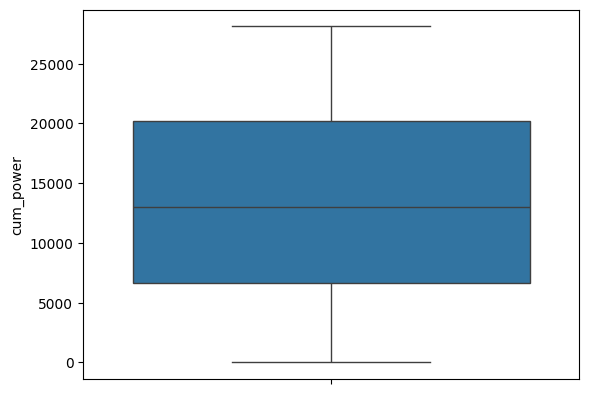

In [19]:
sns.boxplot(data['cum_power'])

<Axes: ylabel='Frequency'>

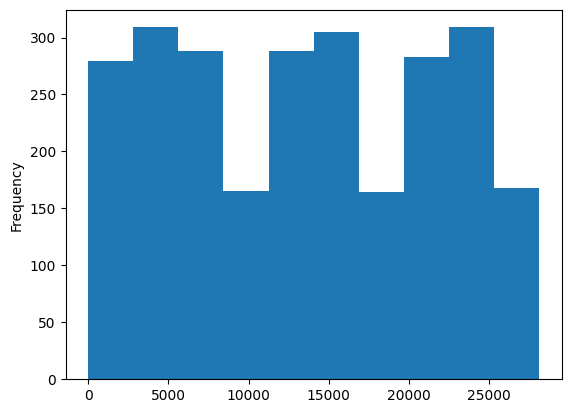

In [20]:

data['cum_power'].plot(kind='hist')

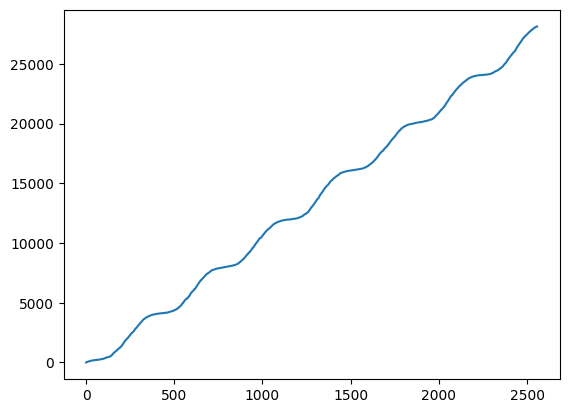

In [21]:

plt.plot(data['cum_power'])

In [22]:
data['date']= pd.to_datetime(data['date'], infer_datetime_format=True)
data.dtypes

date         datetime64[ns]
cum_power           float64
dtype: object

In [23]:
data.columns

Index(['date', 'cum_power'], dtype='object')

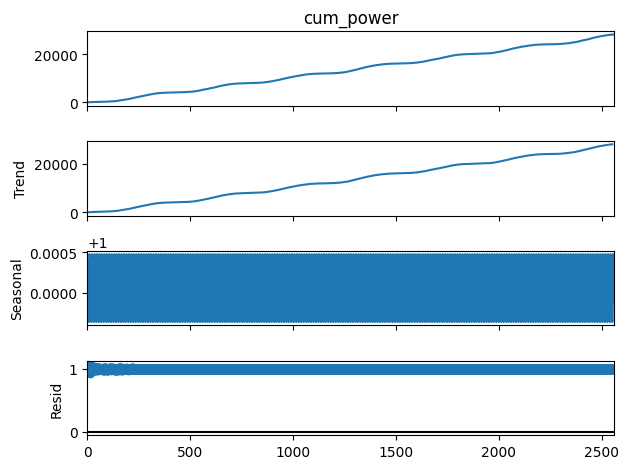

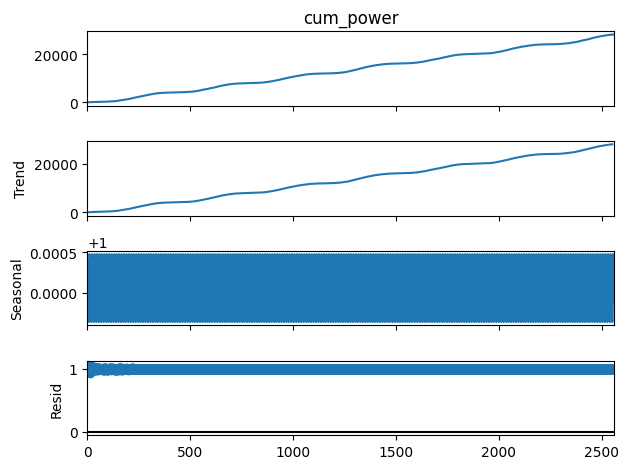

In [24]:
#Decomposition Chart
# Multiplicative Model
decompose_mul = sm.tsa.seasonal_decompose(data.cum_power, model = 'multiplicative', period=12)
decompose_mul.plot()

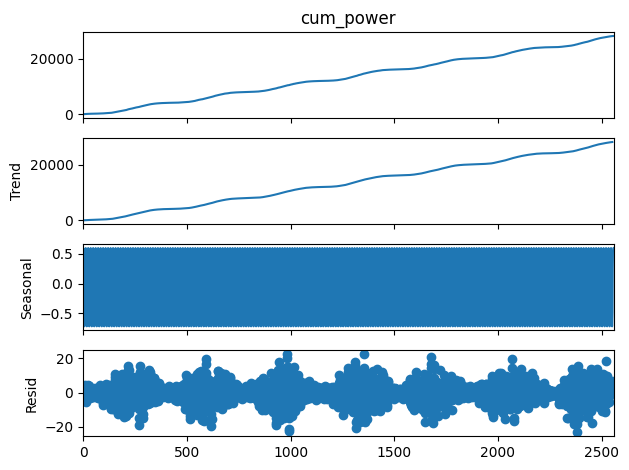

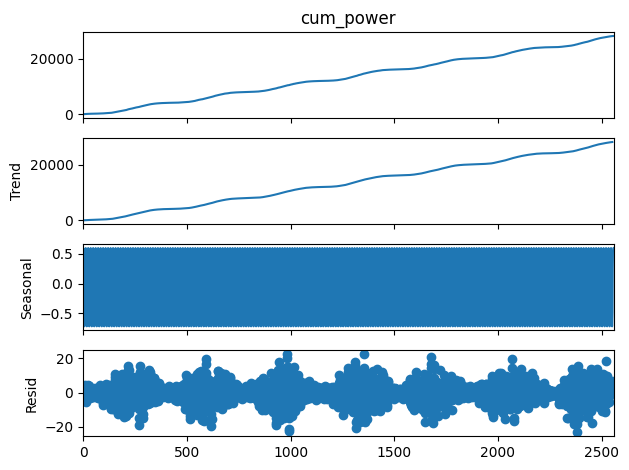

In [25]:
# Additive Model
decompose_add = sm.tsa.seasonal_decompose(data.cum_power, model = 'additive', period=12)
decompose_add.plot()

In [26]:
#ARIMA Model
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
data.shape


(2558, 2)

In [27]:
train = data.head(2046)
test = data.tail(512)

In [28]:
# Auto ARIMA will automatically discover the optimal order for an ARIMA model
import pmdarima as pm
ar_model = pm.auto_arima(data.cum_power, start_p=0,start_q=0,
                        max_p=12,max_q=12,
                        m=1,
                        d=None,
                        seasonal=False,
                        start_P=0,trace=True,
                        error_action='warn',stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18025.637, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15947.568, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16895.797, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20652.126, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=15701.892, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=15535.761, Time=0.36 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=15481.458, Time=0.53 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=15440.824, Time=0.44 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=15417.796, Time=0.59 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=15400.516, Time=0.72 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=15384.142, Time=0.72 sec
 ARIMA(9,1,0)(0,0,0)[0] intercept   : AIC=15373.994, Time=0.90 sec
 ARIMA(10,1,0)(0,0,0)[0] intercept   : AIC=15365.384, Time=1.12 sec
 ARIMA(11,1,0)(0,0,0)[0] intercept   : AIC=15344.211, Time=1.27 sec
 ARIMA(12,1,0)(0,

In [29]:
# Best Parameters ARIMA(4,1,1)(0,0,0)[0]
model = ARIMA(train.cum_power, order=(4,1,1))
res=model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:              cum_power   No. Observations:                 2046
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -6104.678
Date:                Wed, 19 Jun 2024   AIC                          12221.357
Time:                        13:38:06   BIC                          12255.096
Sample:                             0   HQIC                         12233.731
                               - 2046                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2248      0.023     54.348      0.000       1.181       1.269
ar.L2         -0.2204      0.028     -7.978      0.000      -0.275      -0.166
ar.L3          0.0284      0.027      1.046      0.2

In [30]:
# Forecast on train data
start_index = len(train)
end_index = start_index + 511
forecast_best = res.predict(start=start_index,end=end_index)
print(forecast_best)

2046    21765.989034
2047    21786.875486
2048    21807.882577
2049    21828.889814
2050    21849.868100
            ...     
2553    28941.431552
2554    28950.345196
2555    28959.243705
2556    28968.127107
2557    28976.995425
Name: predicted_mean, Length: 512, dtype: float64


In [31]:
# Evaluate Forecast
rmse_best = sqrt(mean_squared_error(test.cum_power, forecast_best))
print('Test RMSE: %.3f' % rmse_best)

Test RMSE: 1311.272


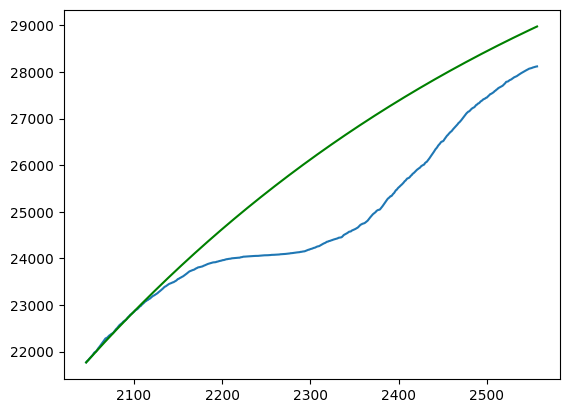

In [32]:
# PLotting forecasted against actual numbers
plt.plot(test.cum_power)
plt.plot(forecast_best, color='green')
plt.show()

In [33]:
#Forecasting using Data Driven Approach
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [34]:
# Creating a function which will calculate MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [35]:
#Simple Expotential Method
ses_model = SimpleExpSmoothing(train['cum_power']).fit()
pred_ses = ses_model.predict(start=test.index[0], end=test.index[-1])
mape_SEM = MAPE(pred_ses, test.cum_power)
mape_SEM

11.9259757333063

In [37]:
#HOLT Winter
hw_model = Holt(train['cum_power']).fit()
pred_hw_model = hw_model.predict(start=test.index[0],end=test.index[-1])
mape_HM = MAPE(pred_hw_model,test.cum_power)
mape_HM

9.591595893080044

In [38]:
#Holt Winter exponential smoothing with additive seasonality and additive trend
hw_model_add_add = ExponentialSmoothing(train['cum_power'], seasonal='add', trend='add',seasonal_periods=4).fit()
pred_hw_model_add_add = hw_model_add_add.predict(start=test.index[0],end=test.index[-1])
mape_HWE_add = MAPE(pred_hw_model_add_add, test.cum_power)
mape_HWE_add

9.565716286830186

In [39]:
#Holt Winter Exponential smoothing with multiplicative seasonality and additive trend
hw_model_mul_add = ExponentialSmoothing(train['cum_power'], seasonal='mul',trend='add', seasonal_periods=4).fit()
pred_hw_model_mul_add = hw_model_mul_add.predict(start=test.index[0],end=test.index[-1])
mape_HWE_mul = MAPE(pred_hw_model_mul_add, test.cum_power)
mape_HWE_mul

9.479272806025172

In [40]:
data_mape = {"MODEL":pd.Series(["Simple Exponential Method","Holt method","HWE smoothing with add. Sn. & add. trend","HWE smoothing with Mul. Sn. & add. trend"]),"RMSE_Values":pd.Series([mape_SEM,mape_HM,mape_HWE_add,mape_HWE_mul])}
table_mape=pd.DataFrame(data_mape)
table_mape

,MODEL,RMSE_Values
0,Simple Exponential Method,11.925976
1,Holt method,9.591596
2,HWE smoothing with add. Sn. & add. trend,9.565716
3,HWE smoothing with Mul. Sn. & add. trend,9.479273


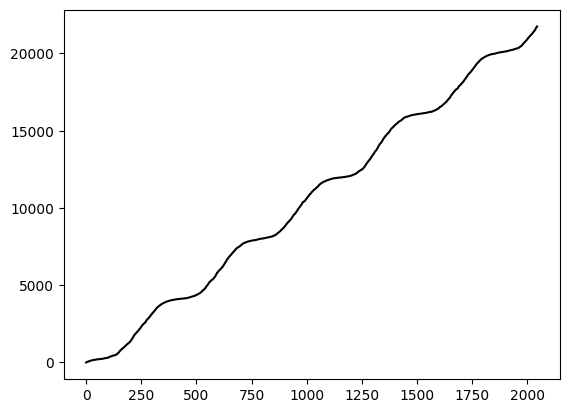

In [41]:
plt.plot(train.index, train["cum_power"], label='Train',color="black")


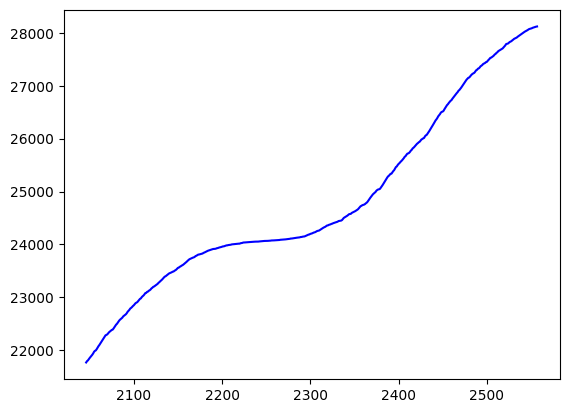

In [42]:
plt.plot(test.index, test["cum_power"], label='Test',color="blue")


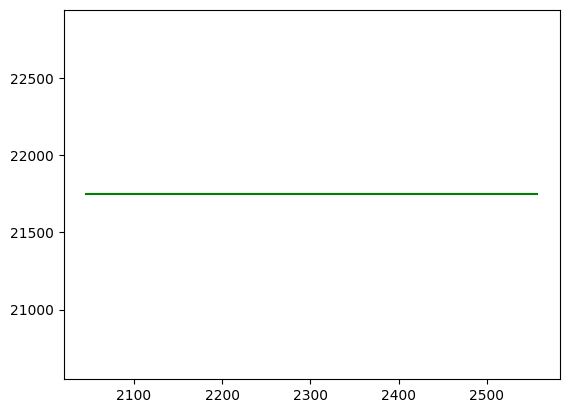

In [43]:
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")


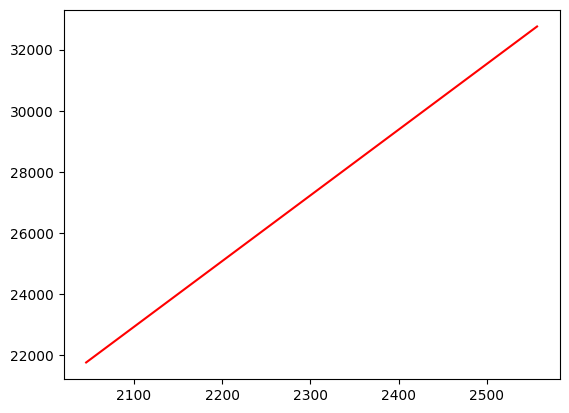

In [44]:
plt.plot(pred_hw_model.index, pred_hw_model, label='Holts_winter',color="red")


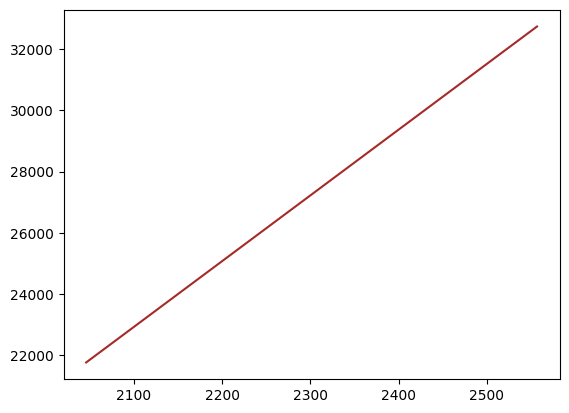

In [45]:
plt.plot(pred_hw_model_add_add.index,pred_hw_model_add_add,label="HoltsWinterExponential_1",color="brown")


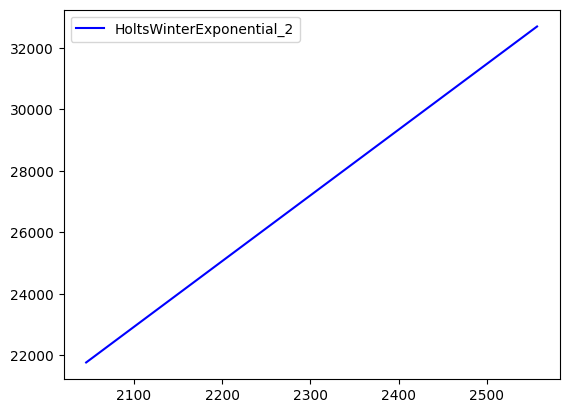

In [46]:
plt.plot(pred_hw_model_mul_add.index,pred_hw_model_mul_add,label="HoltsWinterExponential_2",color="blue")
plt.legend(loc='best')

In [47]:
# Final model of Holt Winters Multiplicative Seasonality and Additive Trend on 100% data
final_model = ExponentialSmoothing(data['cum_power'],seasonal='mul',trend='add',seasonal_periods=4).fit()

In [48]:
new_data = pd.read_csv("/Users/macbookpro/Desktop/hdd/DS/Assignment/28-Forecasting/Datasets_Forecasting-3/solarpower_cumuldaybyday2.csv")
new_data

,date,cum_power
0,26/10/2011,0.1
1,27/10/2011,10.2
2,28/10/2011,20.2
3,29/10/2011,29.6
4,30/10/2011,34.2
...,...,...
2553,22/10/2018,28101.0
2554,23/10/2018,28109.0
2555,24/10/2018,28115.0
2556,25/10/2018,28117.0


In [49]:
newdata_pred = final_model.predict(start=new_data.index[0],end = new_data.index[-1])
newdata_pred

0          14.739883
1           1.373083
2          13.396468
3          24.866431
4          35.295985
            ...     
2553    28103.867424
2554    28107.436092
2555    28117.213713
2556    28121.881121
2557    28124.044101
Length: 2558, dtype: float64

In [50]:
new_data['cum_power_Predicted'] = pd.Series(newdata_pred)
new_data.drop(columns='cum_power',inplace=True)
new_data

,date,cum_power_Predicted
0,26/10/2011,14.739883
1,27/10/2011,1.373083
2,28/10/2011,13.396468
3,29/10/2011,24.866431
4,30/10/2011,35.295985
...,...,...
2553,22/10/2018,28103.867424
2554,23/10/2018,28107.436092
2555,24/10/2018,28117.213713
2556,25/10/2018,28121.881121


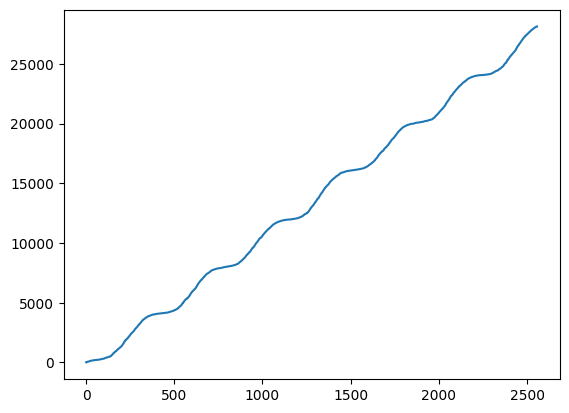

In [51]:
plt.plot(new_data['cum_power_Predicted'])

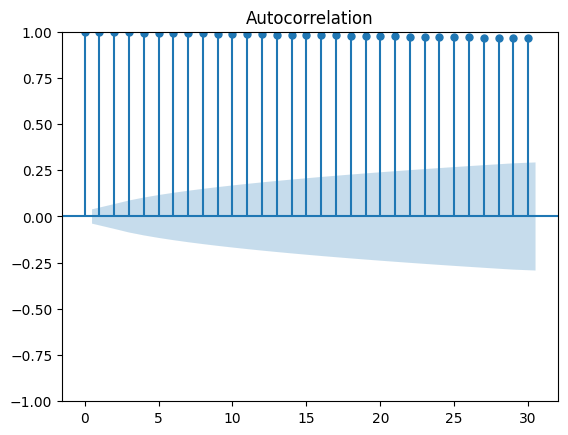

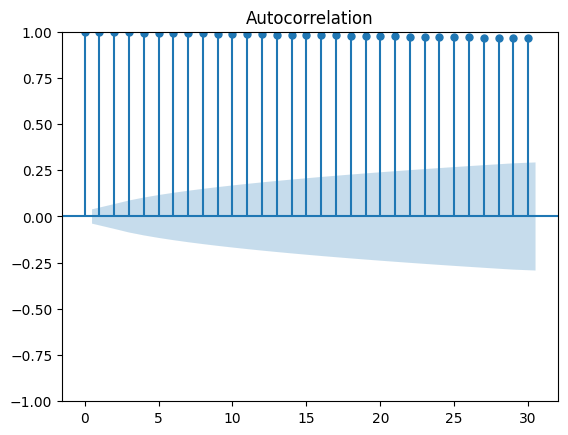

In [52]:
tsa_plots.plot_acf(data.cum_power,lags=30)